<a href="https://colab.research.google.com/github/BenjaminRathman/Iris-Logistical-Regression-model/blob/main/MyOwnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_wine


In [8]:
data = load_wine()
df = pd.DataFrame(data["data"], columns=data.feature_names)
df["target"] = data.target
df.head()
#visual data (we need to look for data imbalances, mutlicollinearity, outliers, etc )
#df.isna().sum() this check NAN values in the data set in practice this will be none

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

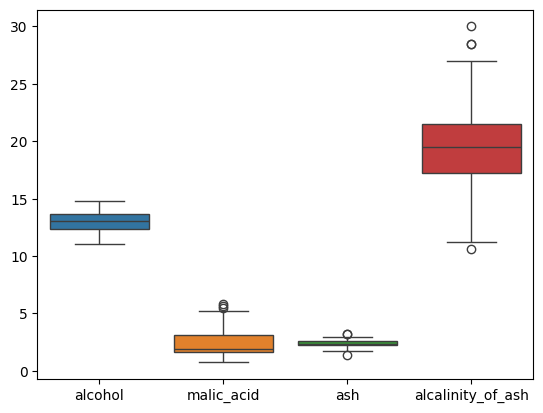

In [11]:
#to check for ourliers
import seaborn as sns
sns.boxplot(df.iloc[:  ,   :4]) #panda indexing getting 4 columns

In [12]:
#splitting into training and testing
from sklearn.model_selection import train_test_split
X = df.drop(columns="target")
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
#from sklearn.tree import DecisionTreeClassifier, plot_tree
#import matplotlib.pyplot as plt

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
X_train.loc[0, "flavanoids"]

model.score(X_test, y_test)

0.7555555555555555

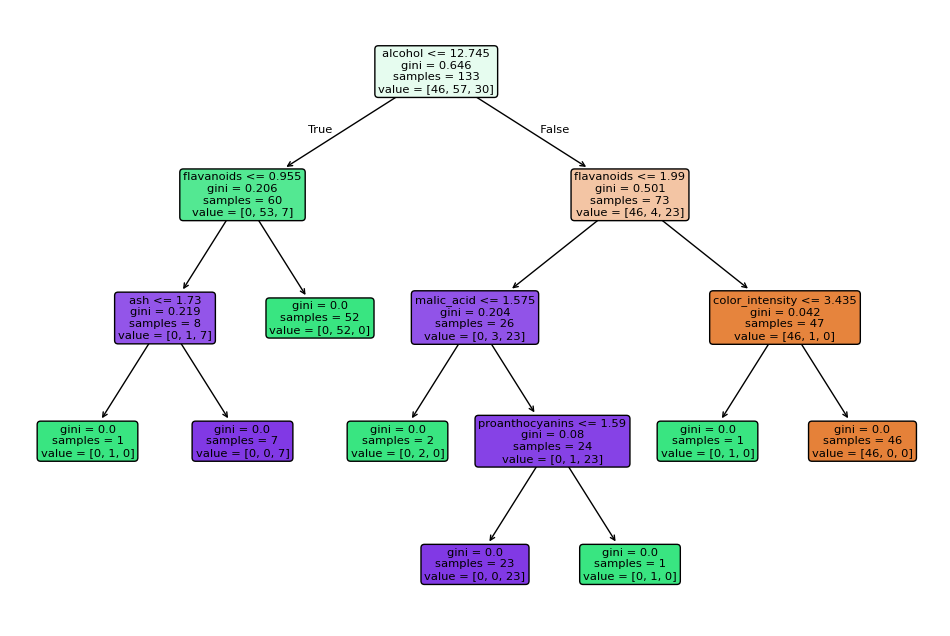

In [26]:
plt.figure(figsize=(12, 8)) # Adjust figure size for better visualization
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True) #call plot_tree to visulize model
plt.show()